<a href="https://colab.research.google.com/github/gustacoutinho/DataAnalysis-EnergyAndPIB/blob/main/Pergunta_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Qual o impacto do aumento do consumo de energia primária sobre o PIB de uma nação?

In [19]:
!pip install xlrd==1.2.0
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive/


In [20]:
# Importação das Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [21]:
sns.set(rc={'figure.figsize':(20,10)})

In [22]:
#Leitura csv e selecionamento de dados
df_pib = pd.read_csv("drive/MyDrive/Trab/pib.csv", sep=";")
df_pib = df_pib[['Country Name', '2010', '2011', '2012', '2013', '2014', '2015',
                  '2016', '2017', '2018', '2019', '2020']]

#Função de tratamento da estrutura do dataframe para corresponder com a pergunta
def alteraEstruturadf(df):
  filtered_pib = pd.DataFrame()
  for index, row in df.iterrows():
      for i in range(2010, 2021):
        filtered_pib.loc[i,'PIB'] = row[str(i)]
        filtered_pib.loc[i,'Country Name'] = row['Country Name']

  filtered_pib['PIB'] = filtered_pib['PIB'].str.replace('.','')
  filtered_pib['PIB'] = filtered_pib['PIB'].astype({"PIB": int})
  return filtered_pib

#Função para filtrar o dataframe pelo país desejado
def filtraCountrydf(country):
  df_mask_pib = df_pib['Country Name'] == country
  filtered_df = df_pib[df_mask_pib]
  return filtered_df


filtered_df = filtraCountrydf('Brazil')
df_pib_final = alteraEstruturadf(filtered_df)
df_pib_final


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,PIB,Country Name
2010,220883810857709,Brazil
2011,261615660666662,Brazil
2012,246522829389401,Brazil
2013,247281936221669,Brazil
2014,245604376602873,Brazil
2015,180221199953868,Brazil
2016,179569326581023,Brazil
2017,206351468876198,Brazil
2018,191693370838189,Brazil
2019,187782427372078,Brazil


In [23]:
#Função para filtrar o dataframe pelo país desejado
def filtraCountrydf(country):
  df_mask_energy = df_energy['country'] == country
  filtered_df = df_energy[df_mask_energy]
  return filtered_df

#Função para converter Terawatts para Megawatts, para aproximar o maximo possivel com os valores comparativos plotados
def converteParaMega(energy):
  return energy * 1000000
    
#Função de tratamento da energia primaria do dataframe para corresponder com a pergunta
def trataPrimaryEnergy(df):
  for index, row in df.iterrows():
      pe = str(row['primary_energy_consumption'])
      pe = pe + '0'
      pei = pe.replace('.', '')
      pei = int(pei)
      df.at[index,'primary_energy_consumption'] = converteParaMega(pei)
      
  return df

#Leitura csv e selecionamento de dados e realizar a chamada das funções criadas para tratamento dos dados
df_energy = pd.read_csv("drive/MyDrive/Trab/energy.csv", sep=';')
df_energy = df_energy[['country', 'year', 'primary_energy_consumption' ]]
df_energy = df_energy.drop(df_energy[df_energy.year < 2010].index)
df_energy = df_energy.drop(df_energy[df_energy.year > 2020].index)

filtered_df = filtraCountrydf('Brazil')
df_energy_final = trataPrimaryEnergy(filtered_df)
df_energy_final = df_energy_final.set_index('year')
df_energy_final

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,8,9,12,13,16,17,20,22,32,33,34,35,38,54,56,66,72,74,80,84,89,91,95,96,97,100,103,109,118,119,120,122,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,primary_energy_consumption
year,,
2010,Brazil,30426560000000
2011,Brazil,31828060000000
2012,Brazil,32404330000000
2013,Brazil,33620150000000
2014,Brazil,34387800000000
2015,Brazil,33889090000000
2016,Brazil,33014940000000
2017,Brazil,33432620000000
2018,Brazil,33658220000000


In [24]:
#Função de Inserção de ano no dataframe
def insereAno(df):
    for index, row in df.iterrows():
      df.at[index, 'year'] = str(2010 + index)
    return df

#Merge dos dataframes de PIB e energia tratados, e normalização
df_merge = pd.concat([df_pib_final, df_energy_final], axis=1)
df_merge = df_merge[['PIB', 'country', 'primary_energy_consumption']]
X = df_merge.drop(['country'], axis=1)
scaler = preprocessing.StandardScaler()
normalized_energy = scaler.fit_transform(X)
normalized_energy


array([[ 0.30300285, -2.38249884],
       [ 1.45623093, -1.15115373],
       [ 1.02891233, -0.64484816],
       [ 1.05040469,  0.4233602 ],
       [ 1.00290847,  1.09781048],
       [-0.8482649 ,  0.65964843],
       [-0.86672118, -0.10837179],
       [-0.10844679,  0.25859805],
       [-0.52345692,  0.45680815],
       [-0.63418624,  1.19976217],
       [-1.86038324,  0.19088505]])

In [25]:
df = pd.DataFrame(normalized_energy, columns=['PIB', 'primary_energy_consumption'])
df = df.rename(columns={'PIB': "PIB", 'primary_energy_consumption': "Consumo de Energia"}, errors="raise")

In [26]:
#Realiza a Correlação de Pearson utilizando o método pandas.DataFrame.corr
print("Correlação de Pearson: \n")
df.corr(method ='pearson')

Correlação de Pearson: 



,PIB,Consumo de Energia
PIB,1.000000,-0.305893
Consumo de Energia,-0.305893,1.000000


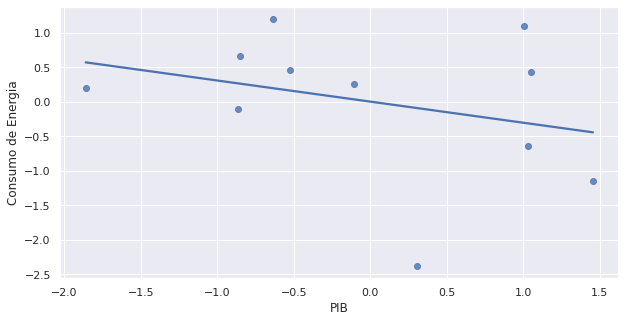

In [27]:
#Correlação de Pearson Graficamente com linha de tendência utilizando o método seaborn.regplot
import seaborn as sb
sns.set(rc={'figure.figsize':(10,5)}) 
sb.regplot(x = "PIB", 
            y = "Consumo de Energia",  
            ci = None, 
            data = df)